# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2023-07-24_2024-07-01.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-30,2024-07-01,331.896003,333.821784,303.767078,319.292734,5.456432e+10,7.205188e+10
1,2024-06-29,2024-06-30,346.330442,358.597825,331.958359,331.965149,3.964131e+10,7.776767e+10
2,2024-06-28,2024-06-29,360.285056,370.833762,344.410983,346.098401,4.244841e+10,8.051604e+10
3,2024-06-27,2024-06-28,359.660890,367.300597,349.926055,360.783138,4.332530e+10,8.025328e+10
4,2024-06-26,2024-06-27,368.298537,378.818344,353.753203,359.823574,4.428485e+10,8.187881e+10


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-30,2024-07-01,331.896003,333.821784,303.767078,319.292734,5.456432e+10,7.205188e+10
1,2024-06-29,2024-06-30,346.330442,358.597825,331.958359,331.965149,3.964131e+10,7.776767e+10
2,2024-06-28,2024-06-29,360.285056,370.833762,344.410983,346.098401,4.244841e+10,8.051604e+10
3,2024-06-27,2024-06-28,359.660890,367.300597,349.926055,360.783138,4.332530e+10,8.025328e+10
4,2024-06-26,2024-06-27,368.298537,378.818344,353.753203,359.823574,4.428485e+10,8.187881e+10
...,...,...,...,...,...,...,...,...
338,2023-07-28,2023-07-29,268.140020,288.509109,266.378484,287.613760,6.048599e+10,2.939989e+10
339,2023-07-27,2023-07-28,289.660511,297.873976,270.545729,271.851377,9.542756e+10,2.991113e+10
340,2023-07-26,2023-07-27,295.878884,323.661000,284.393261,291.167363,1.907117e+11,3.185185e+10
341,2023-07-25,2023-07-26,280.540532,311.779354,247.652710,295.096310,1.749348e+11,2.910136e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,343,343,343.000000,343.000000,343.000000,343.000000,3.430000e+02,3.430000e+02
mean,2024-01-11 00:00:00,2024-01-12 00:00:00,469.639932,496.918811,445.941714,469.874668,8.672300e+10,7.385147e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,130.513077,134.250525,126.015643,130.307559,1.130874e+10,1.704698e+10
25%,2023-10-17 12:00:00,2023-10-18 12:00:00,237.858193,248.288591,231.419679,239.335187,3.179727e+10,2.838589e+10
50%,2024-01-11 00:00:00,2024-01-12 00:00:00,342.895443,358.840818,319.854341,339.718476,5.456432e+10,4.055654e+10
75%,2024-04-05 12:00:00,2024-04-06 12:00:00,631.618489,657.457579,605.651037,632.019194,9.720663e+10,1.338454e+11
max,2024-06-30 00:00:00,2024-07-01 00:00:00,1508.691451,1523.283928,1217.892593,1497.371931,5.749581e+11,1.941508e+11
std,NaN,NaN,297.557602,317.809987,277.721074,297.285877,9.460691e+10,5.487500e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       343 non-null    datetime64[ns]
 1   End         343 non-null    datetime64[ns]
 2   Open        343 non-null    float64       
 3   High        343 non-null    float64       
 4   Low         343 non-null    float64       
 5   Close       343 non-null    float64       
 6   Volume      343 non-null    float64       
 7   Market Cap  343 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 21.6 KB


### EDA

c:\Users\Randell\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


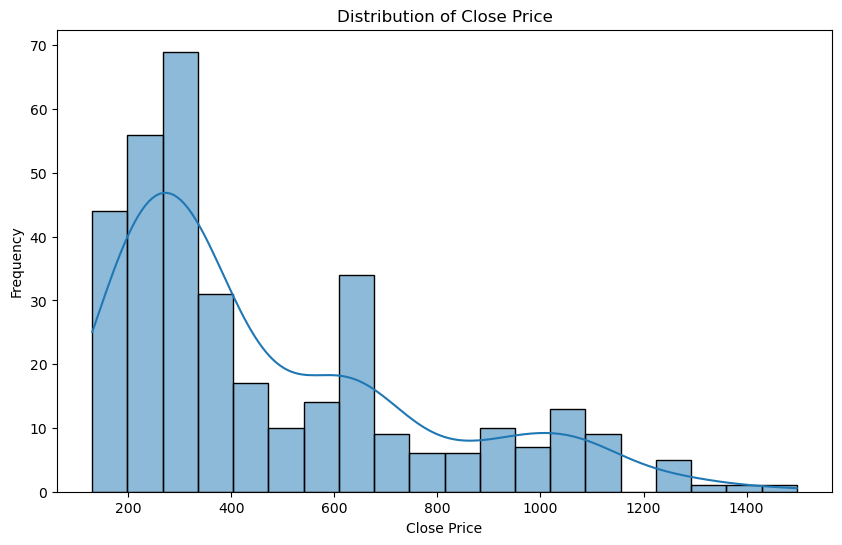

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

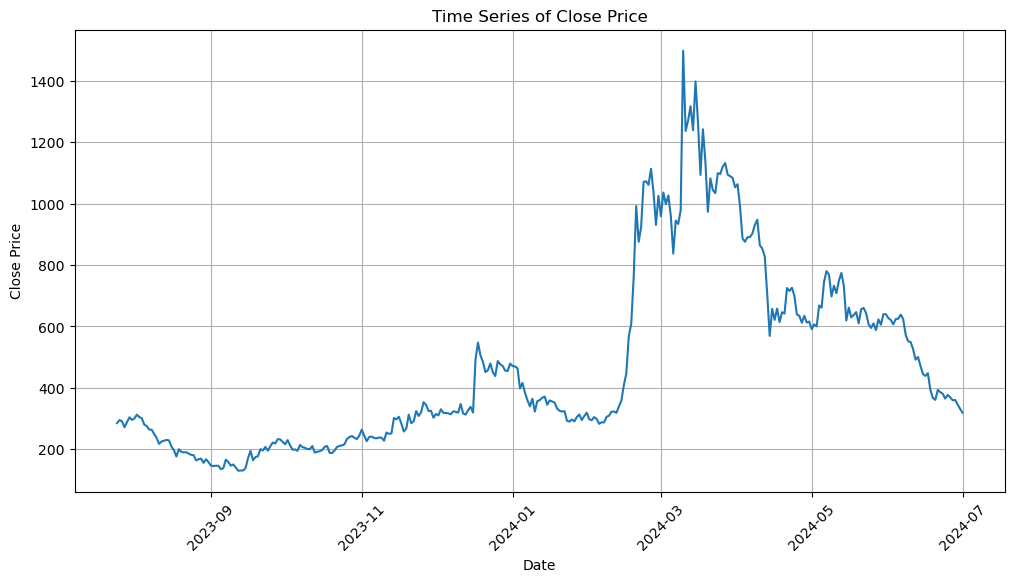

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 2422.7494565404027


In [12]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 766.1478682624407
Gradient Boosting Mean Squared Error: 2200.6652435866827
Support Vector Regressor Mean Squared Error: 116606.62818074989


### Testing the models

In [13]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [638.97477237]


In [ ]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1034.3342983]
